In [96]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf 
import matplotlib.pyplot as plt


for dirname, _, filenames in os.walk('kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

kaggle\Salary.csv


In [97]:
TotalDataset = pd.read_csv("kaggle/Salary.csv")
TotalDataset.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [98]:
#separando o training set e o test set

from sklearn.model_selection import train_test_split

x = TotalDataset['Salary']
y = TotalDataset['YearsExperience']

x_train, x_test, y_train,  y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [99]:
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model               

In [100]:
def train_model(model, feature, label, my_epochs, 
                my_batch_size=None, my_validation_split=0.2):
  """Feed a dataset into the model in order to train it."""

  history = model.fit(x=feature,
                      y=label,
                      batch_size=my_batch_size,
                      epochs=my_epochs,
                      validation_split=my_validation_split)

  # Gather the model's trained weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Isolate the root mean squared error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse, history.history   

print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


In [101]:
def plot_the_loss_curve(epochs, mae_training, mae_validation):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
  plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
  plt.legend()
  
  # We're not going to plot the first epoch, since the loss on the first epoch
  # is often substantially greater than the loss for other epochs.
  merged_mae_lists = mae_training[1:] + mae_validation[1:]
  highest_loss = max(merged_mae_lists)
  lowest_loss = min(merged_mae_lists)
  delta = highest_loss - lowest_loss
  print(delta)

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)
   
  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


In [111]:
# The following variables are the hyperparameters.
learning_rate = 0.0044
epochs = 75
batch_size = 5

# Split the original training set into a reduced training set and a
# validation set. 
validation_split=0.2

# Identify the feature and the label.
my_feature= x_train  # the median income on a specific city block.
my_label= y_train # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on the neighborhood's median income.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions to build and train the model.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)



Epoch 1/75
5/5 [==============================] - 0s 36ms/step - loss: 11064968192.0000 - root_mean_squared_error: 105190.1562 - val_loss: 12785435648.0000 - val_root_mean_squared_error: 113072.7031
Epoch 2/75
5/5 [==============================] - 0s 10ms/step - loss: 10426939392.0000 - root_mean_squared_error: 102112.3828 - val_loss: 12179756032.0000 - val_root_mean_squared_error: 110361.9297
Epoch 3/75
5/5 [==============================] - 0s 9ms/step - loss: 9956967424.0000 - root_mean_squared_error: 99784.6016 - val_loss: 11643999232.0000 - val_root_mean_squared_error: 107907.3672
Epoch 4/75
5/5 [==============================] - 0s 10ms/step - loss: 9534930944.0000 - root_mean_squared_error: 97646.9688 - val_loss: 11193771008.0000 - val_root_mean_squared_error: 105800.6172
Epoch 5/75
5/5 [==============================] - 0s 9ms/step - loss: 9171844096.0000 - root_mean_squared_error: 95769.7422 - val_loss: 10764209152.0000 - val_root_mean_squared_error: 103750.7031
Epoch 6/75
5/

In [115]:

results = my_model.evaluate(x_test, y_test, batch_size=batch_size)

2/2 [==============================] - 0s 4ms/step - loss: 4.7496 - root_mean_squared_error: 2.1793


110360.99281710386


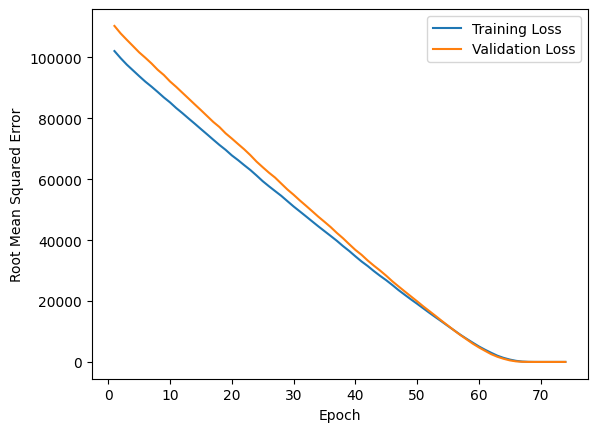

In [113]:
plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])